In [1]:
import pandas as pd 
import numpy as np 
import os
import warnings
warnings.filterwarnings('ignore')



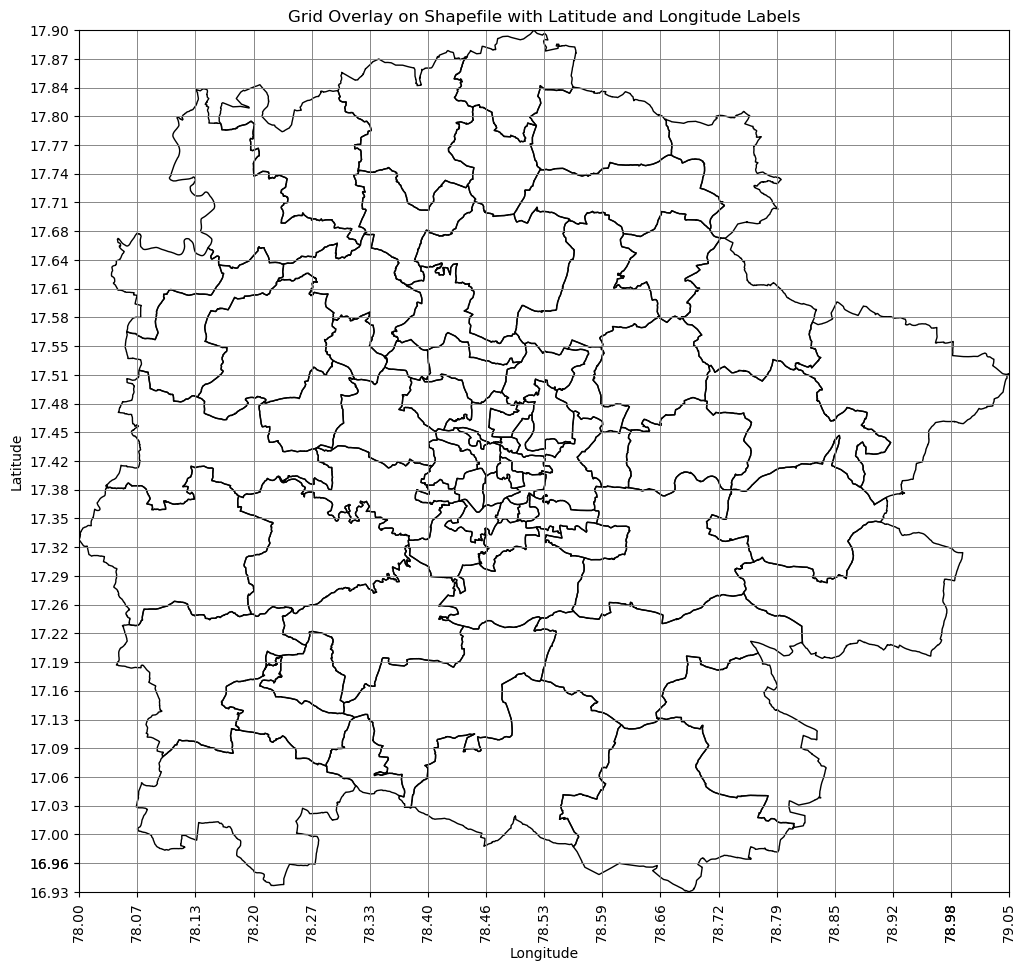

In [4]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
tiff_path = r'C:\Users\rishi\ml_projects\climate\Notebooks\data\HCHO\3945cee2f635794be3a53294f245b6de\response.tiff'
# Load the GeoTIFF file
#tiff_path = 'your_geotiff_file.tif'
with rasterio.open(tiff_path) as src:
    bounds = src.bounds
    width = src.width
    height = src.height
    transform = src.transform
shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
# Load the shapefile
#shapefile_path = 'your_shapefile.shp'
shape_data = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(12, 12))

# Plot the shapefile
shape_data.plot(ax=ax, color='none', edgecolor='black')

# Create the grid and add labels
rows, cols = height, width
lat_labels = []
lon_labels = []

for row in range(rows+1):
    for col in range(cols+1):
        x = transform[2] + col * transform[0]
        y = transform[5] + row * transform[4]
        rect = Rectangle((x, y), transform[0], -transform[4], fill=False, edgecolor='gray', linewidth=0.5)
        ax.add_patch(rect)

        # Collect the labels for longitude and latitude
        if row == 0:  # Add longitude labels at the top edge
            lon_labels.append(x)
        if col == 0:  # Add latitude labels at the left edge
            lat_labels.append(y)

# Ensure the bottom row's latitude label is included
# Adding the latitude label for the last row explicitly
last_lat = transform[5] + (rows - 1) * transform[4]
lat_labels.append(last_lat)

# Ensure the rightmost longitude label is included
# Adding the longitude label for the last column explicitly
last_lon = transform[2] + (cols - 1) * transform[0]
lon_labels.append(last_lon)

# Set plot limits
ax.set_xlim(bounds.left, bounds.right)
ax.set_ylim(bounds.bottom, bounds.top)

# Set labels on the axes
ax.set_xticks(lon_labels)
ax.set_xticklabels([f'{lon:.2f}' for lon in lon_labels], rotation=90)
ax.set_yticks(lat_labels)
ax.set_yticklabels([f'{lat:.2f}' for lat in lat_labels])

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Grid Overlay on Shapefile with Latitude and Longitude Labels')

plt.show()
